In [1]:
using Interact, Plots, DifferentialEquations, LinearAlgebra, Polynomials
using NonLinearDynamicsCourse

WebIO._IJuliaInit()

# Resonancias No lineales, respuestas a un Forzado

Los auto-osciladores se diferencian fundamentalmente de un oscilador harmonico forzado porque no necesitan de una frecuencia externa que se sintonice a su frecuencia de resonancia, el propio auto-oscilador setea su propia frecuencia y fase a partir de su dinamica intrinseca.

En este sentido son osciladores activos, no solo porque tienen su propia fuente de energia sino porque intentan mantener en la medida de lo posible su propia frecuencia de oscilacion cuando son sometidos a un forzado externo, pero cuando la frecuencia del forzado externo se aparta de su auto-frecuencia la respuesta es no trivial. 

A diferencia del oscilador armónico que siempre se somete a la frecuencia del forzado y su unica libertad de respuesta esta en la amplitud y fase de la oscilación, la respuesta del auto-oscilador a un forzado puede ser muy compleja, multiperiódica o cuasi-periódica (sin llegar nunca a ser completamente aperiódica o caótica como en el caso del auto-oscilador de Duffing-Van der Pol que vamos a ver mas adelante)

## Van der Pol Forzado

En el caso de oscilador de Van der Pol introducimos el forzado como una fuerza periodica con dos parametros de control: la frecuencia angular $\omega$ y la amplitud del forzado $A$. Como es una fuerza, se agrega como un termino en la segunda ecuacion, junto con la fuerza restitutiva $-x$ y la disipacion no lineal $\mu(1-x^2)y$. 

Sin embargo, antes de escribir las ecuaciones conviene recordar que cuando definimos un sistema dinamico dijimos que las reglas de evolucion, dadas por las ecuaciones diferenciales eran fijas y no se modificaban en el tiempo. Sin embargo, siempre podemos escribir un sistema uqe depende del tiempo 'inventando' el tiempo como una nueva variable, o en el caso de una funcion periodica, la fase del forzado $\phi$. De esta forma podemos escribir el Van der Pol forzado de la siguiente forma.

$\dot{x} = y$

$\dot{y} = \mu (1 -x^2)y - x + A sin(\phi) $

$\dot{\phi} = \omega$

al costo de agregar una dimension mas, el flujo ahora es 3D. De todos modos vamos a proyectar en el plano $(x,y)$ pero teniendo en cuanta que ahora sobre el espacio de fases (o mejor dicho sobre su proyeccion) vamos a ver trayectorias que se cruzan pero que corresponden a dos coordenadas de $\phi$ diferentes.

De todos modos si bien la forma anterior es la forma correcta de escribir un sistema dinamico. por ahora escribimos las ecuaciones usando la dependencia explicita del tiempo porque es mas eficiente para el calculo y para poder usar las funciones que veniamos utilizando


In [2]:
function fvdp!(du,u,p,t)
    du[1] = u[2]
    du[2] = p[1]*(1.0-u[1]*u[1])*u[2]-u[1]+p[2]*sin(u[3])
    du[3] = p[3]
    du
end    

vdp! (generic function with 1 method)

  0.129388 seconds (460.70 k allocations: 39.394 MiB, 20.94% gc time, 62.64% compilation time)


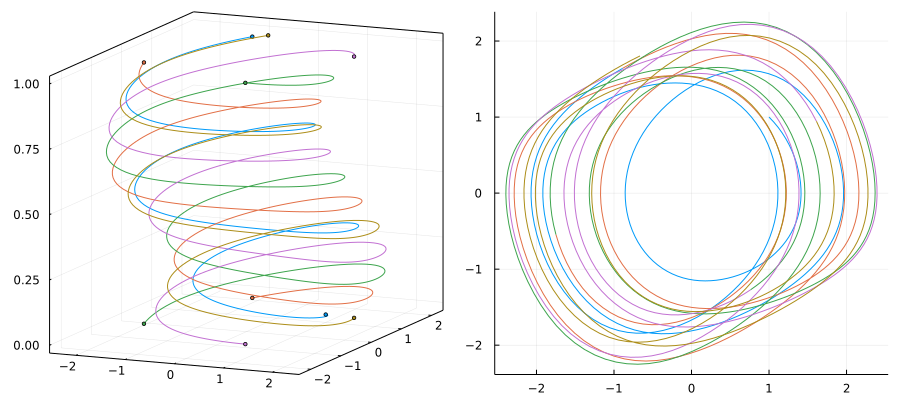

In [42]:
@time  solve_plot_forced(fvdp!,[1.0;1.0;0.0],[0.22,0.55,0.36],2*pi/0.36; tmax=100)

In [43]:
@manipulate throttle=0.5 for μ=0.0:0.01:3.0, A=0:0.01:2.0, ω=0:0.01:2.0, tmax=0:200
    solve_plot_forced(fvdp!,[0.5,0.5,0],[μ,A,ω],2*pi/ω; trans=10,tmax=tmax)
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["μ"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 301, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
151, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000007ca3bb70, Task (runnable) @0x000000007ca3bb70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23

In [6]:
function recurrence_plot(f,u0,p,tmax;trans=0,period=0)
    sol = solve(ODEProblem(f,u0,(0.0,tmax),p))
    
end    
    

LoadError: UndefVarError: solve_plot not defined

## Recurrence Plot

Una mejor forma de visualizar la periodicidad es mediante un **recurrence plot** donde las estructuras periodicas se ven como lineas diagonales y el periodo es el espaciamiento entre las lineas. Como referencia se muestra ademas el periodo del forzado.



In [ ]:
def recurrent_vanderpol_forced_interactive(μ,A,ω,ncycles,ee):
    xini = [1,-1]
    tmax = np.pi*ncycles
    dt = 0.1
    pars={'μ':μ,'A':A,'ω':ω}
    trans = tmax/2
    eps = np.power(10.0,ee)
    recurrence_plot(vanderpol_forced,pars,xini,tmax,dt,trans=trans,eps=eps,period=2*np.pi/ω)


iplot4 = interactive(recurrent_vanderpol_forced_interactive,
                    μ = (0.0, 2.0, 0.001),
                    A = (0,1.0,0.001),
                    ω = (0,3.0,0.001), 
                    ncycles=(1,200,1),
                    ee=(-3,-1,0.001))

iplot4    

## Duffing Forzado

Para ver otro sistema forzado periodico donde la respuesta es mucho mas irregular volvemos al oscilador de Duffing (con friccion lineal). Recordar que llegamos a este sistema escribiendo primero la ecuacion del oscilador armonico de forma general con una fuerza de restitucion $K(x)$

$\dot{x}=y$

$\dot{y}=-\mu y + K(x)$

y eligiendo una fuerza de restitucion con un termino lineal y uno cubico

$K(x) = \beta x - x^3$

Como para valores de $x$ grande va a dominar el termino cubico esta garantizado que el sistema es globalmente atractor porque si $x$ es muy positivo $-K(x)$ es muy negativo y viceversa.

El oscilador de Duffing NO es un auto oscilador porque no tiene friccion negativa (inyeccion de energia). De todas formas lo que nos interesa estudiar aca es el oscilador de Duffing forzado:

$\dot{x} = y$

$\dot{y} = -\mu y + \beta x -  x^3 + A sin(\phi)$

$\dot{\phi} = \omega$

In [ ]:
function duffing_forced!(du,u,p,t)
    du[1] = u[2]
    du[2] = -p[1]*u[2]+u[1]*(p[2]-u[1]*u[1])+p[3]*sin(u[3])
    du[3] = p[4]
    du
end    

In [ ]:
@manipulate throttle=0.5 for μ=0.0:0.01:2.0, β=-5.0:0.01:2.0A=0:0.01:1, ω=0:0.01:1, tmax=0:200
    solve_plot_forced(vdp!,[0.5,0.5,0],[μ,A,ω]; tmax=tmax)
end    

In [ ]:
def plot2D_duffing_forced_interactive(μ,β,A,ω,x0,y0,tmax):
    xini = [x0,y0]
    dt = tmax/500
    pars={'μ':μ,'β':β,'A':A,'ω':ω}
    trans = tmax/4
    solve_plot(duffing_forced,pars,xini,tmax,dt,trans=trans)
    
iplot3 = interactive(plot2D_duffing_forced_interactive,
                    μ = (0, 2.0, 0.001),
                    β = (-5.0,2.0,0.001), 
                    A = (0,5.0,0.001),
                    ω = (0,2.0,0.001), 
                    x0=(-1,1,0.01), 
                    y0=(-1,1,0.01), 
                    tmax=(0,100,0.1))

iplot3    

In [ ]:
def recurrent_duffing_forced_interactive(μ,β,A,ω,ncycles,ee):
    xini = [1,-1]
    tmax = np.pi*ncycles
    dt = 0.1
    pars={'μ':μ,'β':β,'A':A,'ω':ω}
    trans = tmax/2
    eps = np.power(10.0,ee)
    recurrence_plot(duffing_forced,pars,xini,tmax,dt,trans=trans,eps=eps,period=2*np.pi/ω)


iplot4 = interactive(recurrent_duffing_forced_interactive,
                    μ = (0.0, 2.0, 0.001),
                    β = (-2.0,2.0,0.001),
                    A = (0,1.0,0.001),
                    ω = (0,3.0,0.001), 
                    ncycles=(1,200,1),
                    ee=(-4,-3,0.001))

iplot4    

# Subarmonicos. Oscilador cuadratico

Cuando escribimos una forma no lineal para la restitucion $K(x)$ en el oscilador de Duffing elegimos agregar un termino cubico. Que hubiese pasado si en lugar de eso hubiesemos elegido un termino cuadratico? El problema es que el sistema no es globalmente atractor porque para valores de $x$ grande la restitucion es o siempre positiva o siempre negativa y para uno de los dos lados van a escaparse trayectorias. Podemos solucionar eso agregando un termino cuadratico y un termino cubico, pero poniendo un coeficiente muy chico al termino cubico y agregando un parametro al termino cuadratico que es el que nos interesa estudiar. De esta forma la fuerza de restitucion quedaria.

$K(x) = -x +\alpha x^2 - \delta x^3$

y eligiendo por ejemplo $\delta=0.01$. Notar que ahora el parametro $\alpha$ lo colocamos en el termino cuadratico (en Duffing el parametro de control $\beta$ estaba en el termino lineal.
De esta forma cuando $\alpha$ sea igual a cero voy a tener el oscilador armonico para pequeñas oscilaciones, y a medida que voy subiendo el parametro $\alpha$ voy incrementando la no linealidad del oscilador.

El oscilador cuadratico se puede escribir entonces, con un termino de forzado externo como:

$\dot{x} = y$

$\dot{y} = -\mu y - x +\alpha x^2 -  0.01 x^3 + A sin(\phi)$

$\dot{\phi} = \omega$

A diferencia del oscilador de Duffing que tiende a ser simetrico en el eje x, el oscilador cuadratico va a ser mucho mas asimetrico para valores considerables de $\alpha$ y vamos a ver ciclos limites con forma de 'huevo'.

Pero la caracteristica mas relevante que tiene el osiclador cuadratico forzado es la aparicion de subarmonicos, incluso sin variar la frecuencia del forzado, a medida que se incrementa la amplitud. Esta aparicion de subarmonicos (que puede dar lugar a una casacada de duplicaciones de periodo que de lugar a la aparcion de Caos) se observa en muchos ociladores no lineales en el mundo real.

Para el sistema que sigue probar por ejempo: 
$\mu = 0.35$, $\alpha=0.2$ $\omega=1$ para valores crecientes de $A$

In [ ]:
def quadratic_forced(t, x, μ, α, A, ω):
    return [
        x[1],
        -μ*x[1]-x[0]*(1.0-α*x[0]+0.01*x[0]**2)+A*np.sin(ω*t),
    ]

In [ ]:
def plot2D_quadratic_forced_interactive(μ,α,A,ω,tmax):
    xini = [0,0]
    dt = tmax/1000
    pars={'μ':μ,'α':α,'A':A,'ω':ω}
    trans = tmax/2
    solve_plot(quadratic_forced,pars,xini,tmax,dt,trans=trans)
    
iplot3 = interactive(plot2D_quadratic_forced_interactive,
                    μ = (0, 1.0, 0.001),
                    α = (-1,1,0.001), 
                    A = (0,5.0,0.001),
                    ω = (0,2.0,0.001), 
                    tmax=(0,300,0.1))

iplot3    

# Caos

Para ciertos valores de parametros (probar por ejemplo μ = 0.05, β = 1.0, A = 0.44, ω = 0.21) el oscilador de Duffing forzado presenta orbitas aperiodicas, esto es que no se cierran nunca y van llenando el espacio de fases de forma densa en una region. 

Es ademas muy dificil (por no decir imposible en la practica) predecir la evolucion de la trayectoria y anticipar en cual de los lobulos (x positivo o x negativo) va a estar la trayectoria luego de un cierto tiempo. El sistema tiene una de las caracteristicas que define a los **sistemas caoticos**. Una perturbacion infinitesimal en las condiciones iniciales conduce a dos trayectorias que se apartan entre si exponencialmente, algo que se conocio durante el boom de la Teoria del Caos en los '80 como "efecto Mariposa"

Las dos caracteristicas que definen un sistema caotico de forma mas rigurosa son

- Mixing topologico: cualquier region del espacio de fases por pequeña que sea se va a superponer con la evolucion temporal de cualquier otra region si se espera el tiempo suficiente
- Sensibilidad a las condiciones iniciales (efecto Mariposa), dos condiciones inciales muy proximas se alejan entre si durante un tiempo con una tasa de crecimiento exponencial. 
- Otra caracteristica que hace mas rigurosa la definicion es la existencia de infinitas orbitas periodicas inestables.

Nos va a interesar caracterizar solo la segunda propiedad, usamos la funcion butterfly para pasar una condicion incial xini y una perturbacion eps de $10^{-12}$ y en el grafico de la derecha vemos como se alejan entre si en escala logaritmica. A la pendiente positiva se la conoce como **exponente de Lyapunov**. Se puede probar otro sistema que converja a un atractor y mostrar que se ve una pendiente negativa. Un exponente de Lyapunov positivo se considera indicio de Caos.

In [ ]:
μ = 0.05
β = 1.0
A = 0.44
ω = 0.21
xini = [1,-1]
ncycles = 200
tmax = np.pi*ncycles
dt = 0.05
pars={'μ':μ,'β':β,'A':A,'ω':ω}
butterfly(duffing_forced,pars,xini,tmax,dt,eps=1e-12)